<h1 style="text-align: center;">Desafío - Regresión desde la econometría</h1>

- Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo del desafío: individual
- Para la realización del desafío necesitarás apoyarte del archivo `Apoyo Desafío - Clasificación desde la econometría`, disponible en la <a href="https://empieza.desafiolatam.com/cohorts/2091/sections/78288/activities/119116/items/610922">plataforma</a>.

## Descripción
En esta sesión trabajaremos el dataset south african heart, el cual contiene las siguientes variables:
- `sbp`: Presión Sanguínea Sistólica.
- `tobacco`: Promedio tabaco consumido por día.
- `ldl`: Lipoproteína de baja densidad.
- `adiposity`: Adiposidad.
- `famhist`: Antecedentes familiares de enfermedades cardiácas. (Binaria)
- `types`: Personalidad tipo A
- `obesity`: Obesidad.
- `alcohol`: Consumo actual de alcohol.
- `age`: edad.
- `chd`: Enfermedad coronaria. (dummy). **Vector objetivo**.

### Desafío 1: Preparar el ambiente de trabajo
- Cargue las librerías básicas para importación y manipulación de datos (numpy, pandas), gráficos (matplotlib y seaborn) y de modelación econométrica (statsmodels).
- Importe el archivo `southafricanheart.csv` que se encuentra dentro del material de apoyo.

In [1]:
# Utiliza esta celda para importar los módulos solicitados y el set de datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

df = pd.read_csv("southafricanheart.csv").drop(columns=["Unnamed: 0"])

df.head(5)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


- Realice una descripción del set importado mostrando la lista con los nombres de variables importadas

In [2]:
# Utiliza esta celda para mostrar los nombres de las columnas del dataframe

df.columns

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd'],
      dtype='object')

- Muestre un análisis descriptivo mediante .describe()

In [3]:
# Utiliza esta celda para aplicar describe()
#Es para variables continuas, no considerar el chd

df.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


**Comentarios de las variables continuas**
Sus magnitudes son variadas. 
Se aprecia que no existen valores nulos.
Chd no se debe considerar como variable continua, ya que corresponde anuesto vector objetico que es categórico. 

- Muestre distribución de categorías para las variables `famhist` y `chd`.

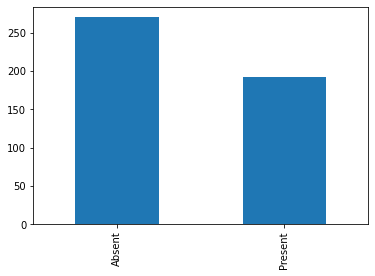

In [4]:
# Utiliza esta celda para mostrar las frecuencias de famhist con un gráfico de barras

df["famhist"].value_counts().plot(kind="bar");

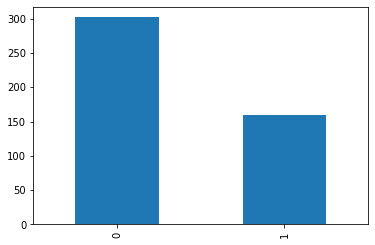

In [5]:
# Utiliza esta celda para mostrar las frecuencias de chd con un gráfico de barras

df["chd"].value_counts().plot(kind="bar");

**Comentarios de las variables categóricas**

Una mayot cantidad de personas no tiene antecendentes familiares ni presentar enfermedad coronaria.
Esto se aprecia en los graficos de barra.

## Desafío 2

A continuación se presenta el siguiente modelo a estimar:

$$
\log\left(\frac{p(\text{chd}=1)}{1-p(\text{chd}=1)}\right)_i=\beta_0 + \beta_{famhist} \cdot \text{famhist}_i
$$

Para ello ejecute los siguientes pasos:
1. Recodifique `famhist` a dummy, asignando 1 a la categoría minoritaria.

In [6]:
# Utiliza esta celda para realizar la codificación solicitada
#Se coloca 1 a al categoria minoritaria

df["famhist"] = df["famhist"].replace(["Absent", "Present"], [0, 1])

df["famhist"].value_counts()

0    270
1    192
Name: famhist, dtype: int64

2. Utilice `smf.logit` para estimar el modelo.

In [7]:
# Utiliza esta celda para instanciar y entrenar el modelo solicitado
#vd ~ vi , df

modelo_1 = smf.logit("chd ~ famhist", df).fit()

Optimization terminated successfully.
         Current function value: 0.608111
         Iterations 5


3. Implemente una función `inverse_logit` que realice el mapeo de log-odds a probabilidad.

In [8]:
# Utiliza esta celda para implementar la función solicitada

#en el x van los logaritmos de chance de ocurrencia

def inverse_logit(x):
    #Retorna una probabilidad
    return 1 / (1 + np. exp(-x))

4.  Con el modelo estimado, responda lo siguiente:
- ¿Cuál es la probabilidad de un individuo con antecedentes familiares de tener una enfermedad coronaria?

In [9]:
# Utiliza esta celda para obtener los log odds en base a los coeficientes, cuando famhist=1.
#En los params estan los coeficientes

log_odds_estimados = modelo_1.params["Intercept"] +  modelo_1.params["famhist"] * 1

# Obtener además la probabilidad utilizando inverse_logit

probabilidad_con_antecedentes = inverse_logit(log_odds_estimados)

print(f"La prob de tener una enfermedad coronaria cuando se tiene antecedentes familiares es de {probabilidad_con_antecedentes}")

La prob de tener una enfermedad coronaria cuando se tiene antecedentes familiares es de 0.5


¿Cuál es la probabilidad de un individuo sin antecedentes familiares de tener
una enfermedad coronaria?

In [10]:
# Utiliza esta celda para obtener los log odds en base a los coeficientes, cuando famhist=0.

log_odds_estimados_sin = modelo_1.params["Intercept"] +  modelo_1.params["famhist"] * 0

# Obtener además la probabilidad utilizando inverse_logit

probabilidad_sin_antecedentes = inverse_logit(log_odds_estimados_sin)

print(f"La prob de tener una enfermedad coronaria cuando se tiene antecedentes familiares es de {probabilidad_sin_antecedentes}")

La prob de tener una enfermedad coronaria cuando se tiene antecedentes familiares es de 0.23703703703703688


- ¿Cuál es la diferencia en la probabilidad entre un individuo con antecedentes y otro sin antecedentes?

In [11]:
# Utiliza esta celda para mostrar las diferencias de ambas probabilidades

print(f"Un individuo con antecendentes familiares tiene {round(probabilidad_con_antecedentes-probabilidad_sin_antecedentes, 2)}"
      f" más de probabilidades tener una enfermedad coronaria")

Un individuo con antecendentes familiares tiene 0.26 más de probabilidades tener una enfermedad coronaria


- Replique el modelo con smf.ols y comente las similitudes entre los coeficientes estimados. _Tip: Utilice $\beta$/4_

In [12]:
# Utiliza esta celda para entrenar el modelo ols y mostrar los coeficientes

modelo_2 =smf.ols("chd ~ famhist", df).fit()
modelo_2.params

Intercept    0.237037
famhist      0.262963
dtype: float64

In [13]:
modelo_1.params

Intercept   -1.168993
famhist      1.168993
dtype: float64

In [14]:
modelo_1.params["famhist"] / 4

0.29224827135747744

**Respuesta**
El valor obtenido al dividir el coeficiente estimado con logit por 4 es similar al valor del coeficiente obtenido con Min Cuad

### Desafío 3: Estimación completa

Implemente un modelo con la siguiente forma:

$$
\log\left(\frac{p(\text{chd}=1)}{1-p(\text{chd}=1)}\right)_i=\beta_0 + \sum_{j=1}^{n}\beta_j \cdot X_{ji}
$$

In [15]:
# Utiliza esta celda para entrenar el modelo solicitado

model_3 = smf.logit("chd ~ sbp + tobacco + ldl + adiposity + famhist + typea + obesity + alcohol + age", df).fit()

Optimization terminated successfully.
         Current function value: 0.510974
         Iterations 6


- Depure el modelo manteniendo las variables con significancia estadística al 5%.

In [16]:
# Utiliza esta celda para mostrar los coeficientes con significancia estadística al 5%

coefs = model_3.summary2().tables[1]

coefs[coefs["P>|z|"] < 0.05]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-6.150721,1.308260,-4.701451,0.000003,-8.714863,-3.586578
tobacco,0.079376,0.026603,2.983758,0.002847,0.027236,0.131517
ldl,0.173924,0.059662,2.915166,0.003555,0.056989,0.290859
famhist,0.925370,0.227894,4.060530,0.000049,0.478706,1.372034
typea,0.039595,0.012320,3.213823,0.001310,0.015448,0.063742
age,0.045225,0.012130,3.728464,0.000193,0.021451,0.068999


In [17]:
# Utiliza esta celda para entrenar el modelo depurado

model_4 = smf.logit("chd ~ tobacco + ldl + famhist + typea + age", df).fit()

Optimization terminated successfully.
         Current function value: 0.514811
         Iterations 6


- Compare los estadísticos de bondad de ajuste entre ambos.

In [18]:
# Utiliza esta celda para mostrar los estadísticos de bondad de ajuste del primer modelo

print(f"La Log verosimilitud del modelo saturado es de {model_3.llf}")

La Log verosimilitud del modelo saturado es de -236.07001618624895


In [19]:
# Utiliza esta celda para mostrar los estadísticos de bondad de ajuste del segundo modelo

print(f"La Log verosimilitud del modelo depurado es de {model_4.llf}")

La Log verosimilitud del modelo depurado es de -237.84278901687432


**Respuesta**

La log verosimilitud es levemente (mayor) en el modelo saturado

- Reporte de forma sucinta el efecto de las variables en el log-odds de tener una enfermedad coronaria

In [20]:
# Utiliza esta celda para mostrar los coeficientes significativos que afectan positivamente
#muestra las variables que inciden en tener una enfermedad coronaria

coefs_dep = model_4.summary2().tables[1]
coefs_dep[coefs_dep["Coef."] > 0]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
tobacco,0.080375,0.025880,3.105731,1.898095e-03,0.029652,0.131099
ldl,0.161992,0.054969,2.946967,3.209075e-03,0.054255,0.269729
famhist,0.908175,0.225758,4.022774,5.751661e-05,0.465697,1.350654
typea,0.037115,0.012167,3.050542,2.284291e-03,0.013269,0.060962
age,0.050460,0.010206,4.944159,7.647332e-07,0.030457,0.070464


In [21]:
# Utiliza esta celda para mostrar los coeficientes significativos que afectan negativamente

coefs_dep = model_4.summary2().tables[1]
coefs_dep[coefs_dep["Coef."] < 0]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-6.446445,0.920872,-7.000372,2.552836e-12,-8.25132,-4.641569


**Respuesta**

*Los factores de riesgo de tener una enfermedad coronaria son el hecho de fumar, tener un valor de ldl alto, tener
antecedentes familiares. tener personalidad tipo a y ser mayor de edad.

*Entre los regresores no hay factores protectores

### Desafío 4: Estimación de perfiles
A partir del modelo depurado, genere las estimaciones en log-odds y posteriormente transfórmelas a probabilidades con `inverse_logit`. Los perfiles a estimar son los
siguientes:

- La probabilidad de tener una enfermedad coronaria para un individuo con características similares a la muestra.

In [22]:
coefs_dep.index

Index(['Intercept', 'tobacco', 'ldl', 'famhist', 'typea', 'age'], dtype='object')

In [29]:
# Utiliza esta celda para mostrar la probabilidad de un invidivuo promedio con antecedentes familiares

log_odds_promedio_con_ant = model_4.params["Intercept"] +  model_4.params["tobacco"] * df["tobacco"].mean() + model_4.params["ldl"] * df["ldl"].mean() + model_4.params["famhist"] * 1 + model_4.params["typea"] * df["typea"].mean() +  model_4.params["age"] * df["age"].mean()

prob_promedio_con_ant = inverse_logit(log_odds_promedio_con_ant)

prob_promedio_con_ant

0.4141865908182172

In [30]:
# Utiliza esta celda para mostrar la probabilidad de un individuo promedio sin antecedentes familiares


# Utiliza esta celda para mostrar la probabilidad de un invidivuo promedio con antecedentes familiares

log_odds_promedio_sin_ant = model_4.params["Intercept"] +  model_4.params["tobacco"] * df["tobacco"].mean() + model_4.params["ldl"] * df["ldl"].mean() + model_4.params["famhist"] * 0 + model_4.params["typea"] * df["typea"].mean() +  model_4.params["age"] * df["age"].mean()

prob_promedio_sin_ant = inverse_logit(log_odds_promedio_sin_ant)

prob_promedio_sin_ant

0.2218599809694638

- La probabilidad de tener una enfermedad coronaria para un individuo con altos niveles de lipoproteína de baja densidad, _manteniendo todas las demás características constantes_.

In [31]:
# Utiliza esta celda para mostrar la probabilidad de un invidivuo promedio con antecedentes familiares y un alto nivel de lopoproteína de baja densidad


log_odds_alto_ldl_con_ant = model_4.params["Intercept"] +  model_4.params["tobacco"] * df["tobacco"].mean() + model_4.params["ldl"] * df["ldl"].max() + model_4.params["famhist"] * 1 + model_4.params["typea"] * df["typea"].mean() +  model_4.params["age"] * df["age"].mean()

prob_alto_ldl_con_ant = inverse_logit(log_odds_alto_ldl_con_ant)
 
prob_alto_ldl_con_ant

0.797178781473293

In [32]:
# Utiliza esta celda para mostrar la probabilidad de un invidivuo promedio sin antecedentes familiares y un alto nivel de lopoproteína de baja densidad

log_odds_alto_ldl_sin_ant = model_4.params["Intercept"] +  model_4.params["tobacco"] * df["tobacco"].mean() + model_4.params["ldl"] * df["ldl"].max() + model_4.params["famhist"] * 0 + model_4.params["typea"] * df["typea"].mean() +  model_4.params["age"] * df["age"].mean()

prob_alto_ldl_sin_ant = inverse_logit(log_odds_alto_ldl_sin_ant)
 
prob_alto_ldl_sin_ant

0.6131514776484566

- La probabilidad de tener una enfermedad coronaria para un individuo con bajos niveles de lipoproteína de baja densidad, _manteniendo todas las demás características constantes_.

In [33]:
# Utiliza esta celda para mostrar la probabilidad de un invidivuo promedio con antecedentes familiares y un bajo nivel de lopoproteína de baja densidad

log_odds_bajo_ldl_con_ant = model_4.params["Intercept"] +  model_4.params["tobacco"] * df["tobacco"].mean() + model_4.params["ldl"] * df["ldl"].min() + model_4.params["famhist"] * 1 + model_4.params["typea"] * df["typea"].mean() +  model_4.params["age"] * df["age"].mean()

prob_bajo_ldl_con_ant = inverse_logit(log_odds_bajo_ldl_con_ant)
 
prob_bajo_ldl_con_ant

0.2777146981541849

In [34]:
# Utiliza esta celda para mostrar la probabilidad de un invidivuo promedio sin antecedentes familiares y un bajo nivel de lopoproteína de baja densidad

log_odds_bajo_ldl_sin_ant = model_4.params["Intercept"] +  model_4.params["tobacco"] * df["tobacco"].mean() + model_4.params["ldl"] * df["ldl"].min() + model_4.params["famhist"] * 0 + model_4.params["typea"] * df["typea"].mean() +  model_4.params["age"] * df["age"].mean()

prob_bajo_ldl_sin_ant = inverse_logit(log_odds_bajo_ldl_sin_ant)
 
prob_bajo_ldl_sin_ant

0.13423736552880983